# **Book Rating Prediction Model Project DSTI**
#### For the DSTI Python Project, I will train a model that predicts a book’s rating using books.csv dataset. This Project includes exploratory analysis of the data, feature engineering and selection, model training and evaluation.
##### 1- Let's explore the data
##### 2- Data Cleaning & Data Processing
##### 3- Plots of relevant attributes
##### 4- Feature selection : feature engineering, feature pruning and choice justification
##### 5- Models training : 
###### 5-1- LinearRegression()
###### 5-1-1 LinearRegression() Model Evaluation
###### 5-2- KNeighborsRegressor()
###### 5-2-1 KNeighborsRegressor() Model Evaluation
###### 5-3- DecisionTreeRegressor()
###### 5-3-1 DecisionTreeRegressor() Model Evaluation
###### 5-4- GradientBoostingRegressor()
###### 5-4-1 GradientBoostingRegressor() Model Evalution
##### 6- Results interpretation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style= 'darkgrid')
sns.set_palette('deep')

## **1 - Let's explore the data**

In [2]:
booksdata = pd.read_csv('/Users/alisemlali/Desktop/Python Project/books.csv', error_bad_lines = False)

/Users/alisemlali/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
booksdata.head(7)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic


In [4]:
# Describe each column of booksdata

booksdata.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
# Check the Data Type of each column in booksdata

booksdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
# Calculate number of rows

len(booksdata)

11123

In [7]:
# Check missing values in booksdata

booksdata.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

**There is no missing value in our csv file**

## **2 - Data Cleaning & Data Processing**

In [8]:
print(booksdata.language_code.unique())

['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']


In [9]:
print(booksdata.bookID.unique())

[    1     2     4 ... 45634 45639 45641]


**en-US/en-GB/en-CA are normally the same language wich is eng : english. We have to correct this information**

In [10]:
booksdata.replace({'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}}, inplace=True)

In [11]:
print(booksdata.language_code.unique())

['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


In [12]:
booksdata.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)

In [13]:
booksdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [14]:
plt.figure(figsize=(10, 5))
autores = booksdata.nlargest(5, ['ratings_count']).set_index('authors')
print(autores)


                            bookID  \
authors                              
Stephenie Meyer              41865   
J.R.R. Tolkien                5907   
J.D. Salinger                 5107   
Dan Brown                      960   
J.K. Rowling/Mary GrandPré       5   

                                                                        title  \
authors                                                                         
Stephenie Meyer                                       Twilight (Twilight  #1)   
J.R.R. Tolkien                            The Hobbit  or There and Back Again   
J.D. Salinger                                          The Catcher in the Rye   
Dan Brown                                Angels & Demons (Robert Langdon  #1)   
J.K. Rowling/Mary GrandPré  Harry Potter and the Prisoner of Azkaban (Harr...   

                            average_rating        isbn         isbn13  \
authors                                                                 
Stephenie Meyer    

<Figure size 720x360 with 0 Axes>

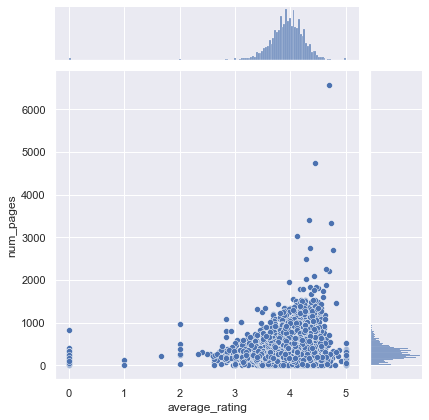

In [15]:
sns.jointplot(x = 'average_rating', y = 'num_pages', data = booksdata)

**Outliers are problematic fo our data set. They can distort statistical analyses and violate their assumptions so we have to remove them. That's what I am going to do below.**

<AxesSubplot:xlabel='num_pages'>

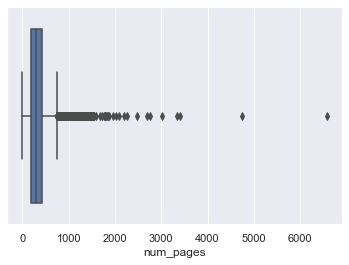

In [16]:
sns.boxplot(x=booksdata['num_pages'])

**We will remove the num_pages outliers**

In [17]:
booksdata = booksdata.drop(booksdata.index[booksdata['num_pages'] >= 2500])

**Let's check again the boxplot of num_pages**

<AxesSubplot:xlabel='num_pages'>

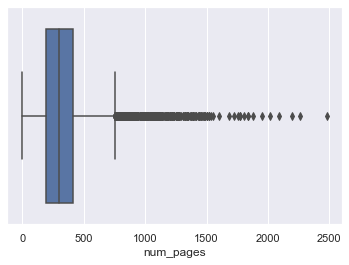

In [18]:
sns.boxplot(x=booksdata['num_pages'])

**Now it's more clear, but we have to remove other outliers of num_pages**

In [19]:
booksdata = booksdata.drop(booksdata.index[booksdata['num_pages'] >= 1600])

<AxesSubplot:xlabel='num_pages'>

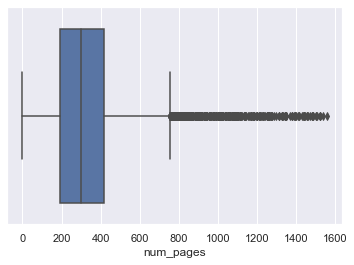

In [20]:
sns.boxplot(x=booksdata['num_pages'])

**There is no more outlier in num_pages**

**We have to do the same for raintgs_count & text_reviews_count**

<AxesSubplot:xlabel='ratings_count'>

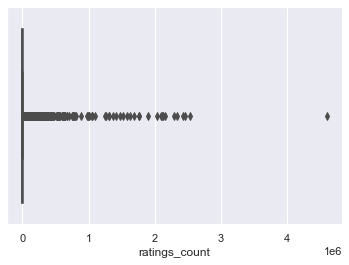

In [21]:
sns.boxplot(x=booksdata['ratings_count'])

In [22]:
booksdata = booksdata.drop(booksdata.index[booksdata['ratings_count'] >= 800000])

<AxesSubplot:xlabel='ratings_count'>

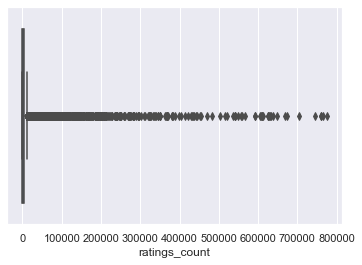

In [23]:
sns.boxplot(x=booksdata['ratings_count'])

<AxesSubplot:xlabel='text_reviews_count'>

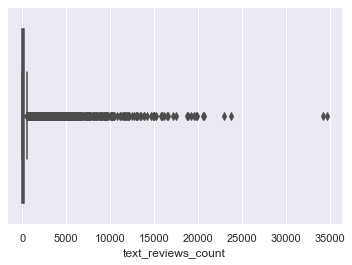

In [24]:
sns.boxplot(x=booksdata['text_reviews_count'])

In [25]:
booksdata = booksdata.drop(booksdata.index[booksdata['text_reviews_count'] >= 17500])

<AxesSubplot:xlabel='text_reviews_count'>

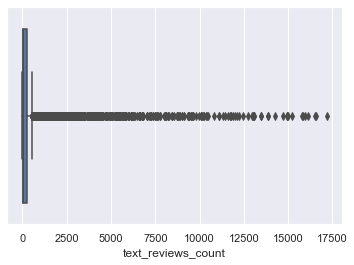

In [26]:
sns.boxplot(x=booksdata['text_reviews_count'])

In [27]:
booksdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11051 entries, 2 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11051 non-null  int64  
 1   title               11051 non-null  object 
 2   authors             11051 non-null  object 
 3   average_rating      11051 non-null  float64
 4   isbn                11051 non-null  object 
 5   isbn13              11051 non-null  int64  
 6   language_code       11051 non-null  object 
 7   num_pages           11051 non-null  int64  
 8   ratings_count       11051 non-null  int64  
 9   text_reviews_count  11051 non-null  int64  
 10  publication_date    11051 non-null  object 
 11  publisher           11051 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


## **3- Plots of relevant attributes**

/var/folders/1g/mbsyqmtj245b7q7bk23pkk740000gn/T/ipykernel_36184/2111378999.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  booksdata[['bookID','average_rating','isbn13','num_pages','ratings_count','text_reviews_count']].hist(ax = ax)


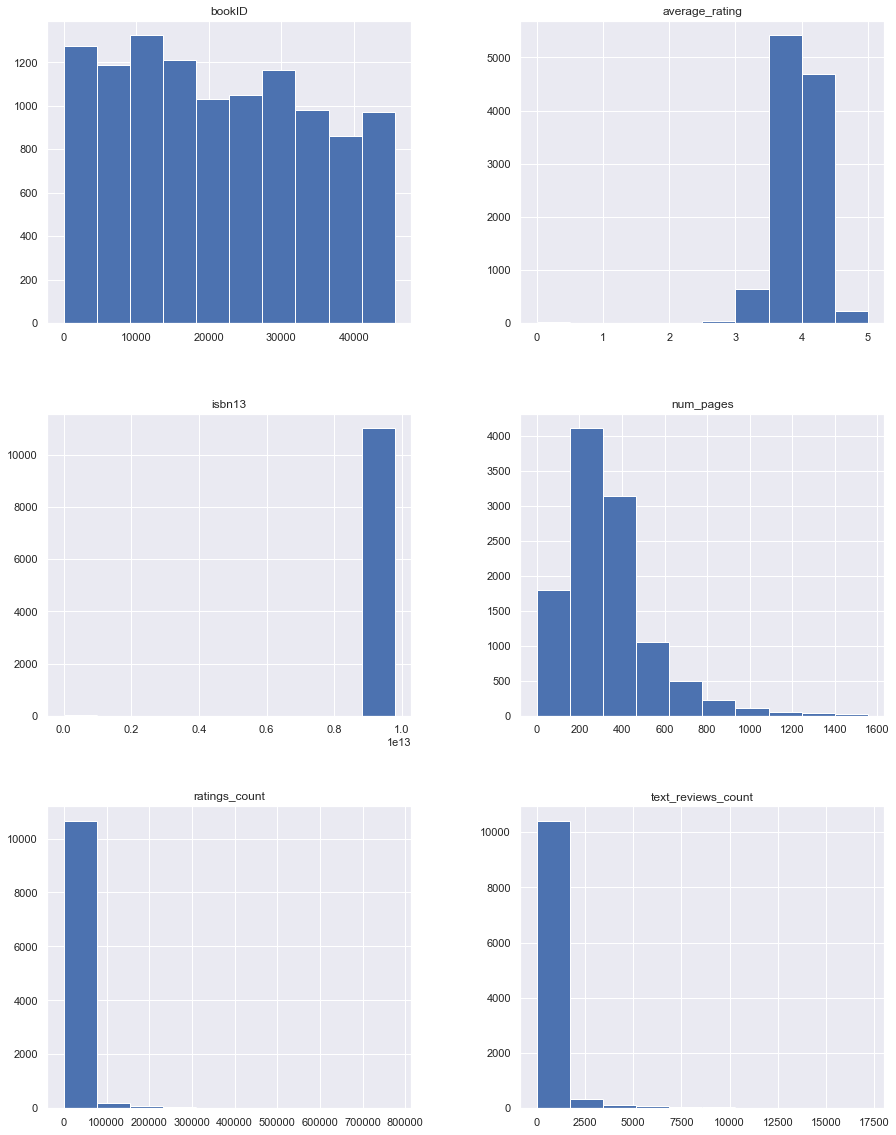

In [28]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
booksdata[['bookID','average_rating','isbn13','num_pages','ratings_count','text_reviews_count']].hist(ax = ax)
plt.show()

/Users/alisemlali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.88'),
  Text(3, 0, '3.89'),
  Text(4, 0, '3.9'),
  Text(5, 0, '3.92'),
  Text(6, 0, '3.93'),
  Text(7, 0, '3.94'),
  Text(8, 0, '3.96'),
  Text(9, 0, '3.97'),
  Text(10, 0, '3.98'),
  Text(11, 0, '3.99'),
  Text(12, 0, '4.0'),
  Text(13, 0, '4.02'),
  Text(14, 0, '4.04'),
  Text(15, 0, '4.05'),
  Text(16, 0, '4.06'),
  Text(17, 0, '4.07'),
  Text(18, 0, '4.09'),
  Text(19, 0, '4.17')])

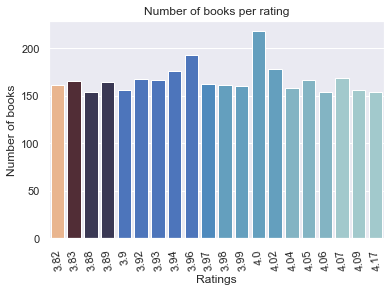

In [29]:
def colors(values, palette_n):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_n, len(values))
    return np.array(palette).take(indices, axis=0)

x=booksdata['average_rating'].value_counts().head(20).index
y=booksdata['average_rating'].value_counts().head(20)
sns.barplot(x,y,palette=colors(y, "icefire"))
plt.title('Number of books per rating')
plt.xlabel('Ratings')
plt.ylabel('Number of books')
plt.xticks(rotation=100)

Text(0, 0.5, 'Number of pages')

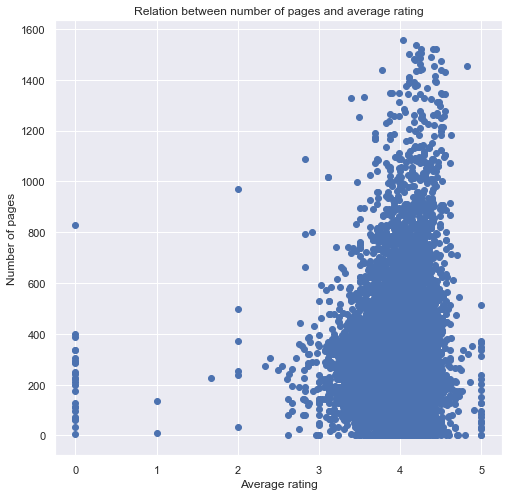

In [30]:
plt.subplots(figsize=(8, 8))
plt.scatter(booksdata.average_rating,booksdata.num_pages)
plt.title("Relation between number of pages and average rating")
plt.xlabel("Average rating")
plt.ylabel("Number of pages")

/Users/alisemlali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


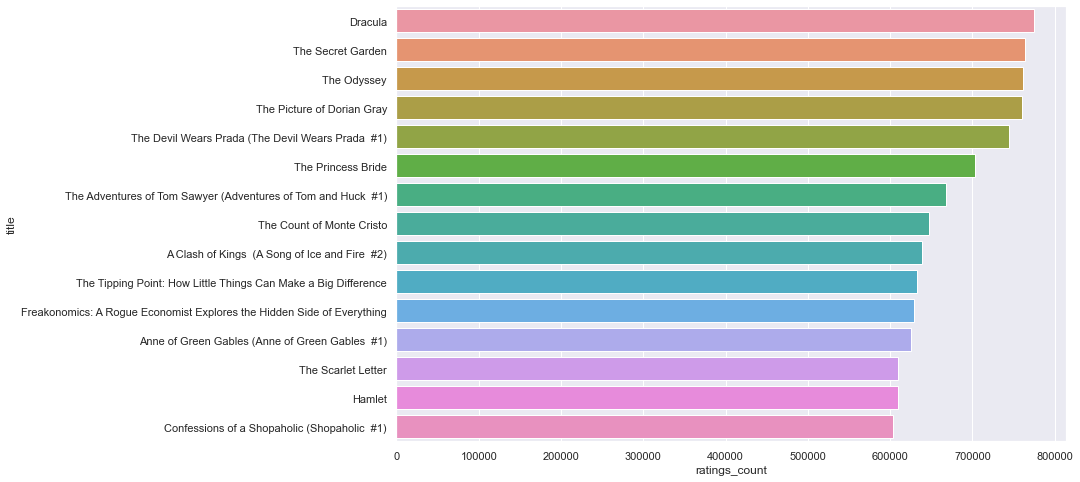

In [31]:
# What are the TOP 15 books that have most number of ratings ? 


TOP15 = booksdata.nlargest(15, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(TOP15, TOP15.index)
plt.show()

## **4-Feature selection : feature engineering, feature pruning and choice justification**

In [32]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [33]:
booksdata['title'] = preprocessing.LabelEncoder().fit_transform(booksdata['title'])

In [34]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,3060,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,9,9647,W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
7,12,9077,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,9076,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,7767,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [35]:
booksdata['authors'] = preprocessing.LabelEncoder().fit_transform(booksdata['authors'])

In [36]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,3060,2615,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,9,9647,6289,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
7,12,9077,1462,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,9076,1462,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,7767,1462,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [37]:
booksdata['publisher'] = preprocessing.LabelEncoder().fit_transform(booksdata['publisher'])

In [38]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,3060,2615,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,1766
5,9,9647,6289,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,1361
7,12,9077,1462,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,786
8,13,9076,1462,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,521
9,14,7767,1462,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,467


In [39]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
booksdata[['language_code']] = OE.fit_transform(booksdata[['language_code']])

In [40]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,3060,2615,4.42,0439554896,9780439554893,2.0,352,6333,244,11/1/2003,1766
5,9,9647,6289,3.74,0976540606,9780976540601,2.0,152,19,1,4/26/2005,1361
7,12,9077,1462,4.38,0517226952,9780517226957,2.0,815,3628,254,11/1/2005,786
8,13,9076,1462,4.38,0345453743,9780345453747,2.0,815,249558,4080,4/30/2002,521
9,14,7767,1462,4.22,1400052920,9781400052929,2.0,215,4930,460,8/3/2004,467


In [41]:
print(booksdata.language_code.unique())

[ 2.  4. 18. 13.  8.  3.  5. 10.  1. 14. 23. 11. 16. 19.  9. 17. 12.  7.
 22. 20. 15. 21.  6.  0.]


In [42]:
booksdata['publication_date'] = pd.to_datetime(booksdata['publication_date'], format='%m/%d/%Y', errors='coerce')

In [43]:
booksdata[booksdata['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,3450,1635,4.10,0553575104,9780553575101,2.0,718,10608,295,NaT,194
11094,45531,4613,1699,3.96,2070323285,9782070323289,4.0,640,15,2,NaT,720


In [44]:
booksdata.loc[booksdata.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
booksdata.loc[booksdata.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [45]:
booksdata['Year'] = pd.DatetimeIndex(booksdata['publication_date']).year

In [46]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Year
2,4,3060,2615,4.42,0439554896,9780439554893,2.0,352,6333,244,2003-11-01,1766,2003
5,9,9647,6289,3.74,0976540606,9780976540601,2.0,152,19,1,2005-04-26,1361,2005
7,12,9077,1462,4.38,0517226952,9780517226957,2.0,815,3628,254,2005-11-01,786,2005
8,13,9076,1462,4.38,0345453743,9780345453747,2.0,815,249558,4080,2002-04-30,521,2002
9,14,7767,1462,4.22,1400052920,9781400052929,2.0,215,4930,460,2004-08-03,467,2004


In [47]:
booksdata['Month'] = pd.DatetimeIndex(booksdata['publication_date']).month

In [48]:
booksdata.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Year,Month
2,4,3060,2615,4.42,0439554896,9780439554893,2.0,352,6333,244,2003-11-01,1766,2003,11
5,9,9647,6289,3.74,0976540606,9780976540601,2.0,152,19,1,2005-04-26,1361,2005,4
7,12,9077,1462,4.38,0517226952,9780517226957,2.0,815,3628,254,2005-11-01,786,2005,11
8,13,9076,1462,4.38,0345453743,9780345453747,2.0,815,249558,4080,2002-04-30,521,2002,4
9,14,7767,1462,4.22,1400052920,9781400052929,2.0,215,4930,460,2004-08-03,467,2004,8


In [49]:
booksdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11051 entries, 2 to 11122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11051 non-null  int64         
 1   title               11051 non-null  int64         
 2   authors             11051 non-null  int64         
 3   average_rating      11051 non-null  float64       
 4   isbn                11051 non-null  object        
 5   isbn13              11051 non-null  int64         
 6   language_code       11051 non-null  float64       
 7   num_pages           11051 non-null  int64         
 8   ratings_count       11051 non-null  int64         
 9   text_reviews_count  11051 non-null  int64         
 10  publication_date    11051 non-null  datetime64[ns]
 11  publisher           11051 non-null  int64         
 12  Year                11051 non-null  int64         
 13  Month               11051 non-null  int64     

## **5- Models Training**

In [50]:
X = booksdata.drop(['average_rating', 'language_code', 'isbn','publication_date','Year','Month'], axis = 1)

In [51]:
y = booksdata['average_rating']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [53]:
# We view the shape of the split data

print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (8840, 8)
X_test: (2211, 8)
Y_train: (8840,)
Y_test: (2211,)


## **5-1- LinearRegression()**

In [54]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
prediction = linreg.predict(x_test)

In [55]:
# We use the predict method to predict the results then we pass the independent variables into it to see the results.

y_pred=linreg.predict(x_test)
y_pred

array([3.93221712, 3.9237133 , 3.87061317, ..., 3.89457696, 3.91592718,
       3.90503191])

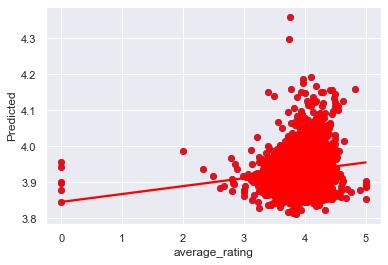

In [56]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

/Users/alisemlali/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='average_rating'>

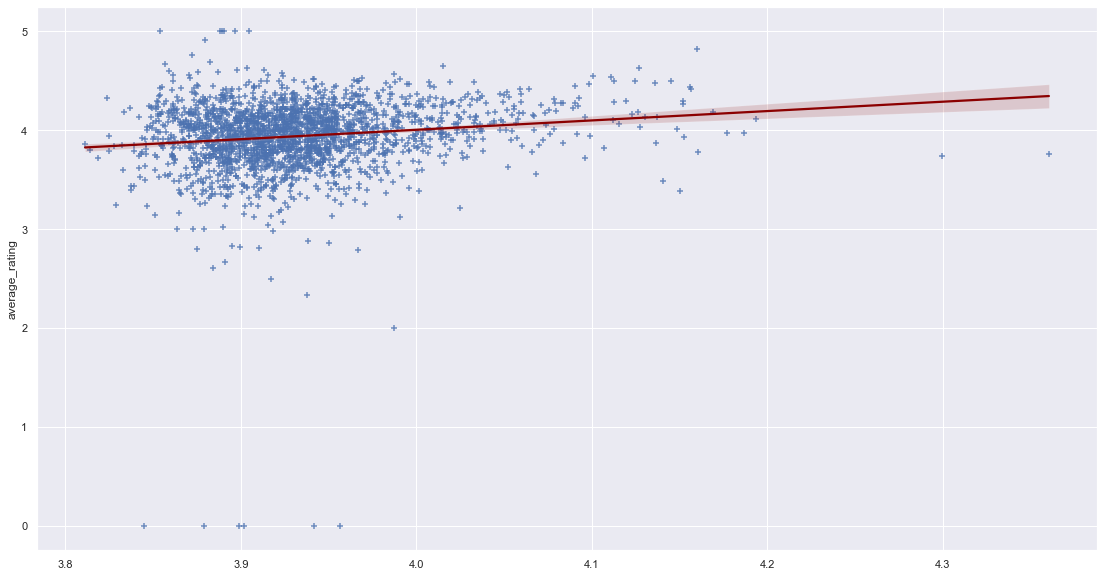

In [57]:
plt.figure(figsize=(19,10))
sns.regplot(y_pred, y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

## **5-1- LinearRegression() Model Evaluation**

In [58]:
from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 2.02


In [59]:
predictions_comparision = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
print(predictions_comparision.sample(20))  

      Observed  Predicted
1256      3.93   3.948265
2118      3.59   3.884724
1069      4.19   3.949255
860       4.16   3.961858
83        3.82   3.878147
1685      3.91   3.925826
1975      3.68   3.982065
2003      3.84   3.961868
1258      4.16   3.943743
1814      4.46   3.903007
169       3.98   3.962468
1699      3.84   3.938289
256       3.00   3.879064
2147      3.73   3.860858
2048      4.35   3.978851
466       4.31   3.924442
2060      4.33   3.893981
655       4.56   3.870693
120       3.93   3.886889
1314      4.11   4.025337


In [60]:
metrics.mean_absolute_error(y_test, y_pred)

0.22999036194902844

EAM = 0,22

In [61]:
metrics.mean_squared_error(y_test, y_pred)

0.12553355178991515

ECM = 0,12

## **5-2- KNeighborsRegressor()**

In [62]:
from sklearn.metrics import r2_score,mean_squared_error

      Observed  Predicted
2116      4.08      3.782
347       4.01      3.998
1396      3.79      3.894
689       3.00      3.884
1488      3.85      3.636
1354      3.96      3.770
36        3.99      3.842
631       4.05      4.014
1527      0.00      4.178
345       4.09      4.056
1736      4.19      3.818
540       3.95      4.092
957       3.97      4.072
112       4.11      3.958
756       4.49      4.004
40        3.26      3.802
119       4.29      4.166
1497      3.91      3.766
2049      4.00      4.456
223       4.26      4.148


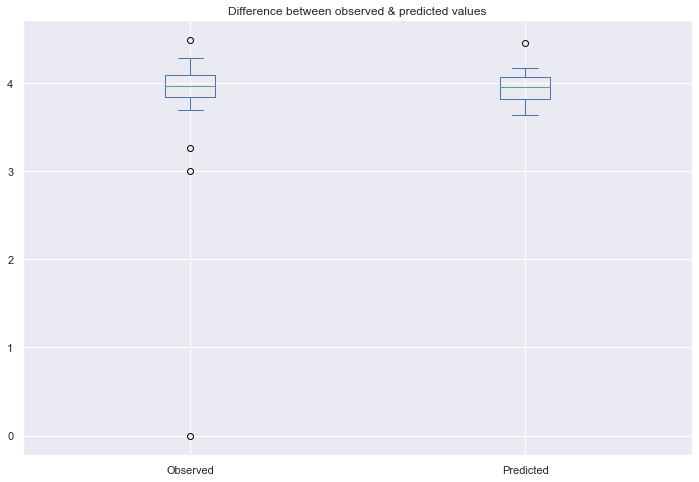

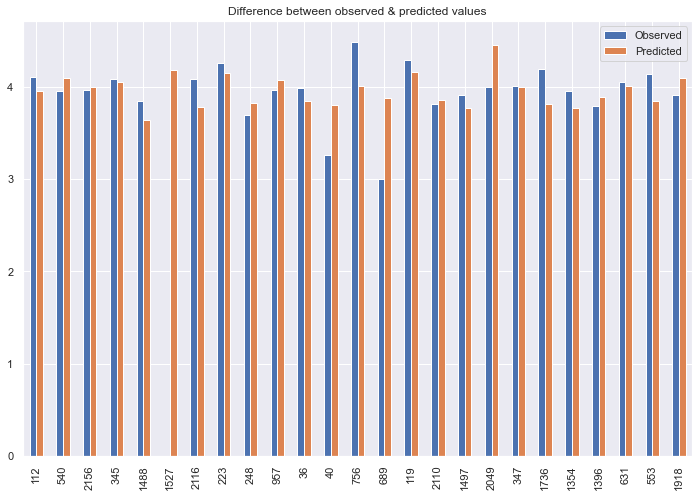

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split


ar = list(KFold(n_splits=5, shuffle=True).split(x_train, y_train))

params={
    "n_neighbors": range(2, 30),
    "leaf_size":[20,30,50,70]
}


y_pred = KNeighborsRegressor().fit(x_train,y_train).predict(x_test)

predictions_comparision = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
predictions_comparision.plot(kind="box", figsize=(12,8),title="Difference between observed & predicted values")
predictions_comparision.plot(kind="bar", figsize=(12,8),title="Difference between observed & predicted values")
print(predictions_comparision.sample(20))    

## **5-2-1 KNeighborsRegressor() Model Evaluation**

In [64]:
metrics.mean_absolute_error(y_test, y_pred)

0.241838986883763

In [65]:
metrics.mean_squared_error(y_test, y_pred)

0.1392322550881954

In [66]:
model_score= KNeighborsRegressor().fit(x_train,y_train).score(x_train,y_train)
print(model_score)  

0.30768621114972594


## **5-3 DecisionTreeRegressor()**

      Observed  Predicted
1708      4.15       4.04
1654      3.99       3.65
2109      4.18       4.09
720       3.93       4.24
2144      3.93       3.38
420       3.64       3.93
958       4.07       4.14
1042      3.94       3.93
1300      3.63       3.92
727       3.77       3.29
1718      4.00       3.87
886       4.17       4.41
1020      4.04       3.93
674       3.42       3.51
2050      3.88       3.84
651       3.69       3.98
306       4.00       3.82
1159      4.29       3.50
441       4.33       4.15
705       3.76       3.53


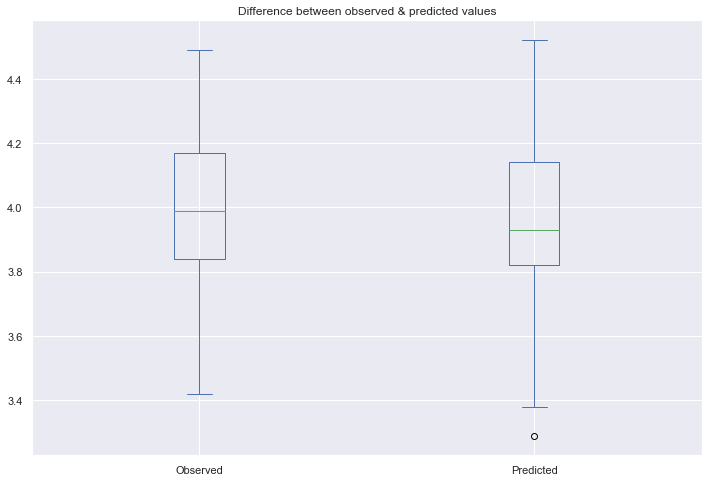

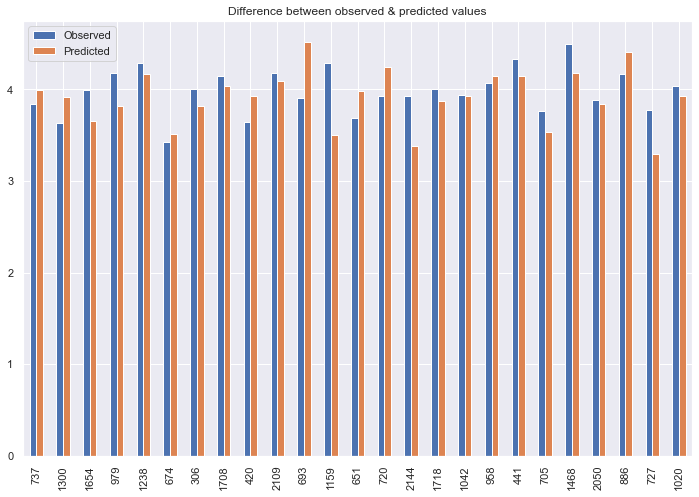

In [67]:
from sklearn.tree import DecisionTreeRegressor

params = {    "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8, 15, 50],
              "min_samples_leaf": [5, 20, 30],
              "max_leaf_nodes": [5, 20],
              }

y_pred = DecisionTreeRegressor().fit(x_train,y_train).predict(x_test)

predictions_comparision = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
predictions_comparision.plot(kind="box", figsize=(12,8),title="Difference between observed & predicted values")
predictions_comparision.plot(kind="bar", figsize=(12,8),title="Difference between observed & predicted values")
print(predictions_comparision.sample(20))    

## **5-3-1 DecisionTreeRegressor() Model Evalutation**

In [68]:
metrics.mean_absolute_error(y_test, y_pred)

0.298082315694256

In [69]:
metrics.mean_squared_error(y_test, y_pred)

0.20042469470827678

In [70]:
model_score= DecisionTreeRegressor().fit(x_train,y_train).score(x_train,y_train)
print(model_score)  

1.0


## **5-4 GradientBoostingRegressor()**

      Observed  Predicted
1291      4.14   3.953563
1862      4.09   3.953232
834       3.36   3.898860
2101      3.94   3.856820
718       3.44   3.851345
1289      3.67   3.899083
2005      3.98   3.897469
1579      3.92   3.917410
235       4.16   3.871507
1995      4.00   3.320219
841       3.33   3.954093
869       3.47   3.926717
1492      3.88   3.961623
1391      3.80   3.871128
253       4.23   3.970663
426       3.64   3.931734
1410      3.72   3.851310
1028      4.38   3.823863
1091      3.78   4.103663
550       4.14   3.850165


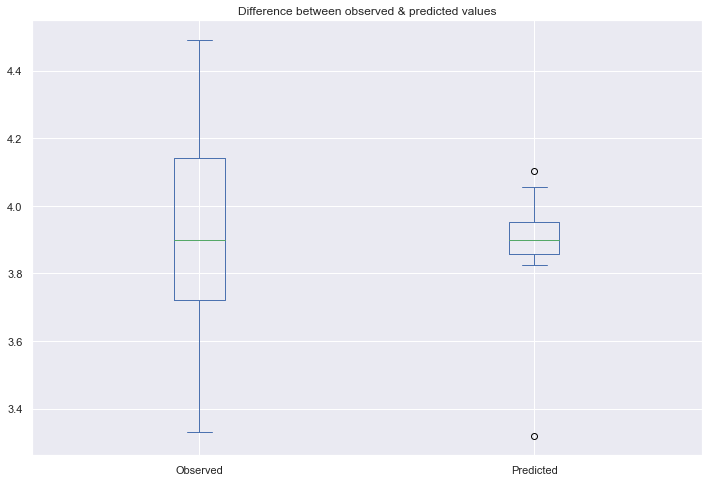

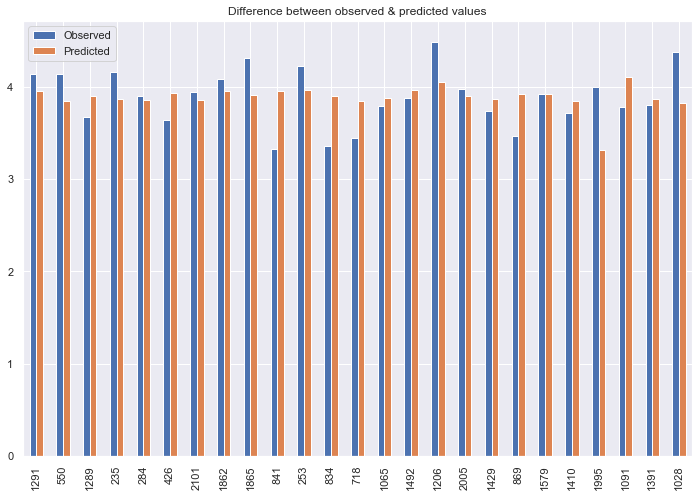

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

params={"n_estimators":[20, 50, 100,200,400], 
        "learning_rate": [0.01, 0.05, 0.1, 0.3],
         "max_depth":[3,5,10], 
        "min_samples_leaf": [3,5],
        "max_features": [0.3, 1]
       } 

y_pred = GradientBoostingRegressor().fit(x_train,y_train).predict(x_test)

predictions_comparision = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
predictions_comparision.plot(kind="box", figsize=(12,8),title="Difference between observed & predicted values")
predictions_comparision.plot(kind="bar", figsize=(12,8),title="Difference between observed & predicted values")
print(predictions_comparision.sample(20))    


## **5-4-1 GradientBoostingRegressor()**

In [72]:
metrics.mean_absolute_error(y_test, y_pred)

0.2241077894525904

In [73]:
metrics.mean_squared_error(y_test, y_pred)

0.11523687941462551

In [74]:
model_score= GradientBoostingRegressor().fit(x_train,y_train).score(x_train,y_train)
print(model_score)   

0.3496002126258423


**From the results we got, we can say that the linear regression model is not very accurate but the predicted values and the actual values are close to each other. We can also see that DecisionTreeRegressor had the best model score with good accuracy between the actual and predicted values. For the GradientBoostingRegressor, we had the least values of EAM = 0,22 and ECM = 0,11. On the other hand the model training score is about 35 % wich is less than the DecisionTreeRegressor. Otherwise, the results we had in terms of predictions are satisfactory**